# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

## Import Statements

In [271]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [272]:
pd.options.display.float_format = '{:,.2f}'.format
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Load the Data

In [3]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
print(f"Median Household: ")
df_hh_income.info()
print("-------------------------------------------------")
print(f"Percentage people below poverty: ")
df_pct_poverty.info()
print("-------------------------------------------------")
print(f"Percentage people completed high schoool: ")
df_pct_completed_hs.info()
print("-------------------------------------------------")
print(f"Share of Race by city: ")
df_share_race_city.info()
print("-------------------------------------------------")
print(f"Deaths by Police: ")
df_fatalities.info()

Median Household: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB
-------------------------------------------------
Percentage people below poverty: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB
-------------------------------------------------
Percentage people completed high schoool: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2932

In [5]:
print(f"Median Household NaN values: {df_hh_income.isna().values.sum()} ")
print(f"Percentage people below poverty NaN values: {df_pct_poverty.isna().values.sum()} ")
print(f"Percentage people completed high schoool NaN values: {df_pct_completed_hs.isna().values.sum()} ")
print(f"Share of Race by city NaN values: {df_share_race_city.isna().values.sum()} ")
print(f"Deaths by Police NaN values: {df_fatalities.isna().values.sum()} ")

Median Household NaN values: 51 
Percentage people below poverty NaN values: 0 
Percentage people completed high schoool NaN values: 0 
Share of Race by city NaN values: 0 
Deaths by Police NaN values: 346 


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [6]:
df_hh_income.loc[df_hh_income["Median Income"].isna(), "Median Income"] = 0
df_hh_income.isna().values.sum()

0

In [7]:
average_age = round(df_fatalities[~df_fatalities['age'].isna()].age.mean())
print(average_age)

37


In [8]:
df_fatalities.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [9]:
df_fatalities.flee.unique()

array(['Not fleeing', 'Car', 'Foot', 'Other', nan], dtype=object)

In [10]:
df_fatalities.dropna(subset=["race"], inplace=True)
df_fatalities.loc[df_fatalities["armed"].isna(), "armed"] = "unarmed"
df_fatalities.loc[df_fatalities["flee"].isna(), "flee"] = "Other"
df_fatalities.loc[df_fatalities["age"].isna(), "age"] = average_age

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [11]:
df_pct_poverty[df_pct_poverty["poverty_rate"].str.find("-") != -1]

Geographic Area              City poverty_rate
573                AL       Whatley CDP            -
608                AK  Attu Station CDP            -
632                AK       Chicken CDP            -
637                AK       Chisana CDP            -
662                AK      Dot Lake CDP            -
...               ...               ...          ...
29261              WY        Oakley CDP            -
29266              WY     Owl Creek CDP            -
29273              WY  Powder River CDP            -
29289              WY     Ryan Park CDP            -
29304              WY    Table Rock CDP            -

[201 rows x 3 columns]

In [12]:
df_pct_poverty.drop(df_pct_poverty[df_pct_poverty["poverty_rate"].str.find("-") != -1].index, inplace=True)

In [13]:
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype(float)
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29128 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29128 non-null  object 
 1   City             29128 non-null  object 
 2   poverty_rate     29128 non-null  float64
dtypes: float64(1), object(2)
memory usage: 910.2+ KB


In [14]:
grouped_poverty = df_pct_poverty.groupby(["Geographic Area"], as_index=False)[["poverty_rate"]].mean()
grouped_poverty.sort_values(["poverty_rate"], ascending=False, inplace=True)

In [15]:
fig = px.bar(grouped_poverty, x="Geographic Area", y="poverty_rate")
fig.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [16]:
df_pct_completed_hs[df_pct_completed_hs.percent_completed_hs.str.find("-") != -1]

Geographic Area              City percent_completed_hs
573                AL       Whatley CDP                    -
632                AK       Chicken CDP                    -
637                AK       Chisana CDP                    -
662                AK      Dot Lake CDP                    -
667                AK     Edna Bay city                    -
...               ...               ...                  ...
29261              WY        Oakley CDP                    -
29266              WY     Owl Creek CDP                    -
29273              WY  Powder River CDP                    -
29289              WY     Ryan Park CDP                    -
29304              WY    Table Rock CDP                    -

[197 rows x 3 columns]

In [17]:
df_pct_completed_hs.drop(df_pct_completed_hs[df_pct_completed_hs.percent_completed_hs.str.find("-") != -1].index, inplace=True)

In [18]:
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.astype(float)
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29132 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29132 non-null  object 
 1   City                  29132 non-null  object 
 2   percent_completed_hs  29132 non-null  float64
dtypes: float64(1), object(2)
memory usage: 910.4+ KB


In [19]:
grouped_highschool = df_pct_completed_hs.groupby(["Geographic Area"], as_index=False)[["percent_completed_hs"]].mean()
grouped_highschool.sort_values(["percent_completed_hs"], ascending=True, inplace=True)

In [20]:
fig = px.bar(grouped_highschool, x="Geographic Area", y="percent_completed_hs")
fig.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

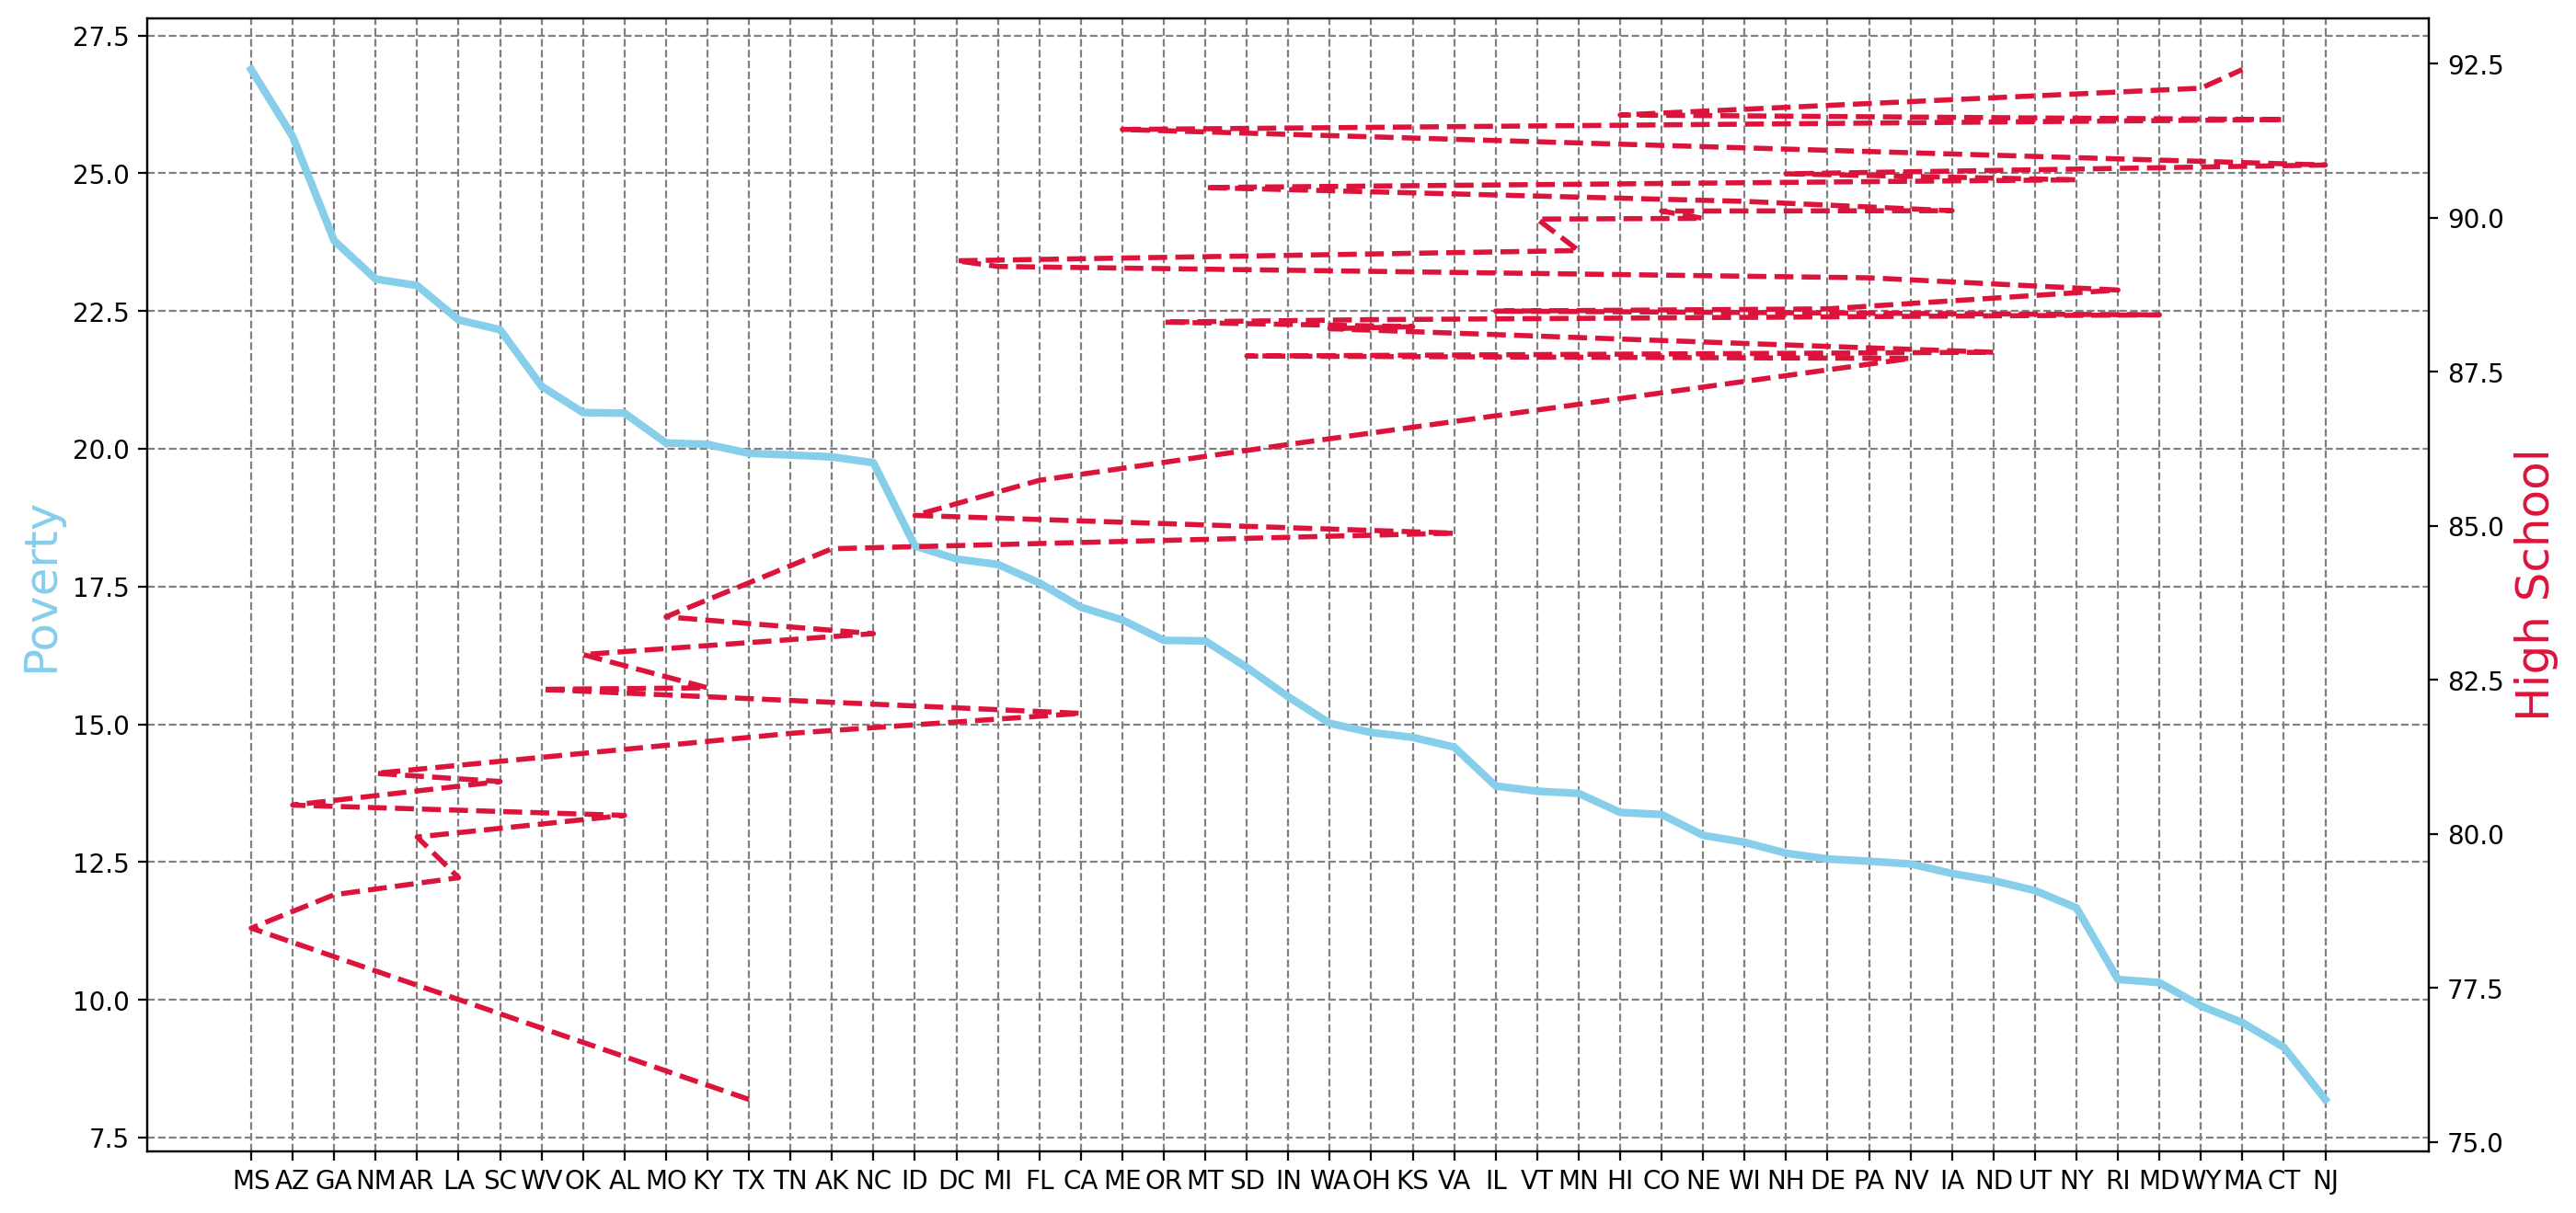

In [22]:
plt.figure(figsize=(16,8), dpi=200)
 
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')
 
ax1.plot(grouped_poverty["Geographic Area"], 
         grouped_poverty.poverty_rate, 
         c='skyblue', 
         linewidth=3)
 
ax2.plot(grouped_highschool["Geographic Area"], 
         grouped_highschool.percent_completed_hs, 
         c='crimson', 
         linewidth=2, 
         linestyle="--")
 
ax1.set_ylabel('Poverty', color='skyblue', fontsize=18)
ax2.set_ylabel('High School', color='crimson', fontsize=18)

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

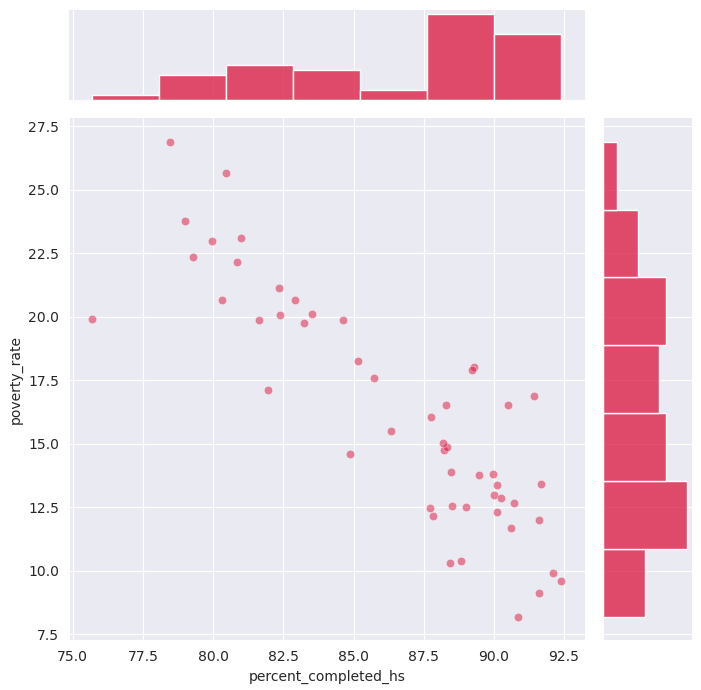

In [25]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=grouped_highschool.percent_completed_hs, 
                y=grouped_poverty.poverty_rate, 
                kind="scatter",
                height=7, 
                color='crimson',
                joint_kws={'alpha':0.5})
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

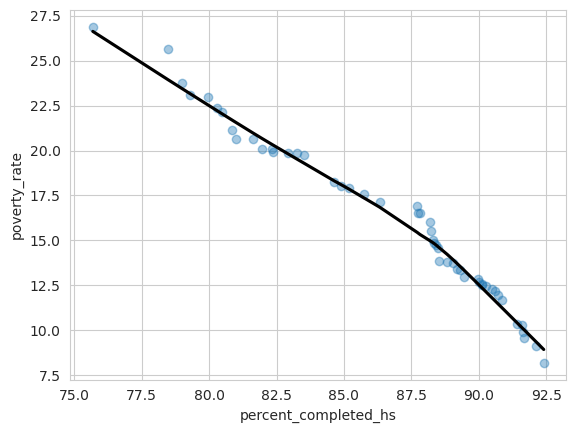

In [27]:
with sns.axes_style("whitegrid"):
    sns.regplot(x=grouped_highschool.percent_completed_hs,
                y=grouped_poverty.poverty_rate,
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
 
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [45]:
df_share_race_city.drop(df_share_race_city[df_share_race_city.share_asian.str.find("X") != -1].index, inplace=True)
df_share_race_city.drop(df_share_race_city[df_share_race_city.share_black.str.find("X") != -1].index, inplace=True)
df_share_race_city.drop(df_share_race_city[df_share_race_city.share_hispanic.str.find("X") != -1].index, inplace=True)
df_share_race_city.drop(df_share_race_city[df_share_race_city.share_native_american.str.find("X") != -1].index, inplace=True)
df_share_race_city.drop(df_share_race_city[df_share_race_city.share_white.str.find("X") != -1].index, inplace=True)

In [50]:
df_share_race_city.share_asian = df_share_race_city.share_asian.astype(float)
df_share_race_city.share_black = df_share_race_city.share_black.astype(float)
df_share_race_city.share_white = df_share_race_city.share_white.astype(float)
df_share_race_city.share_hispanic = df_share_race_city.share_hispanic.astype(float)
df_share_race_city.share_native_american = df_share_race_city.share_native_american.astype(float)
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29248 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29248 non-null  object 
 1   City                   29248 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.8+ MB


In [55]:
grouped_race = df_share_race_city.groupby(["Geographic area"], as_index=False).mean(numeric_only=True)
grouped_race.head()

Geographic area  share_white  share_black  share_native_american  \
0              AK        45.65         0.57                  45.86   
1              AL        72.51        23.32                   0.66   
2              AR        78.45        16.30                   0.76   
3              AZ        59.93         0.95                  28.59   
4              CA        71.87         2.69                   1.72   

   share_asian  share_hispanic  
0         1.39            2.15  
1         0.48            2.98  
2         0.48            4.27  
3         0.73           20.14  
4         5.57           29.65

In [84]:
fig = px.bar(grouped_race, 
             x="Geographic area", 
             y=["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"])
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [79]:
df_fatalities.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [77]:
fig = px.pie(df_fatalities, values=df_fatalities.race.value_counts(), names=df_fatalities.race.value_counts().index, hole=0.5)
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [82]:
df_fatalities.gender.value_counts()

M    2242
F      98
Name: gender, dtype: int64

In [85]:
fig = px.bar(x=df_fatalities.gender.value_counts().index, y=df_fatalities.gender.value_counts())
fig.update_layout(xaxis_title="Gender", yaxis_title="Total deaths")
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [109]:
female_fatalities = df_fatalities[df_fatalities.gender == "F"]
male_fatalities = df_fatalities[df_fatalities.gender == "M"]
df_fatalities.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

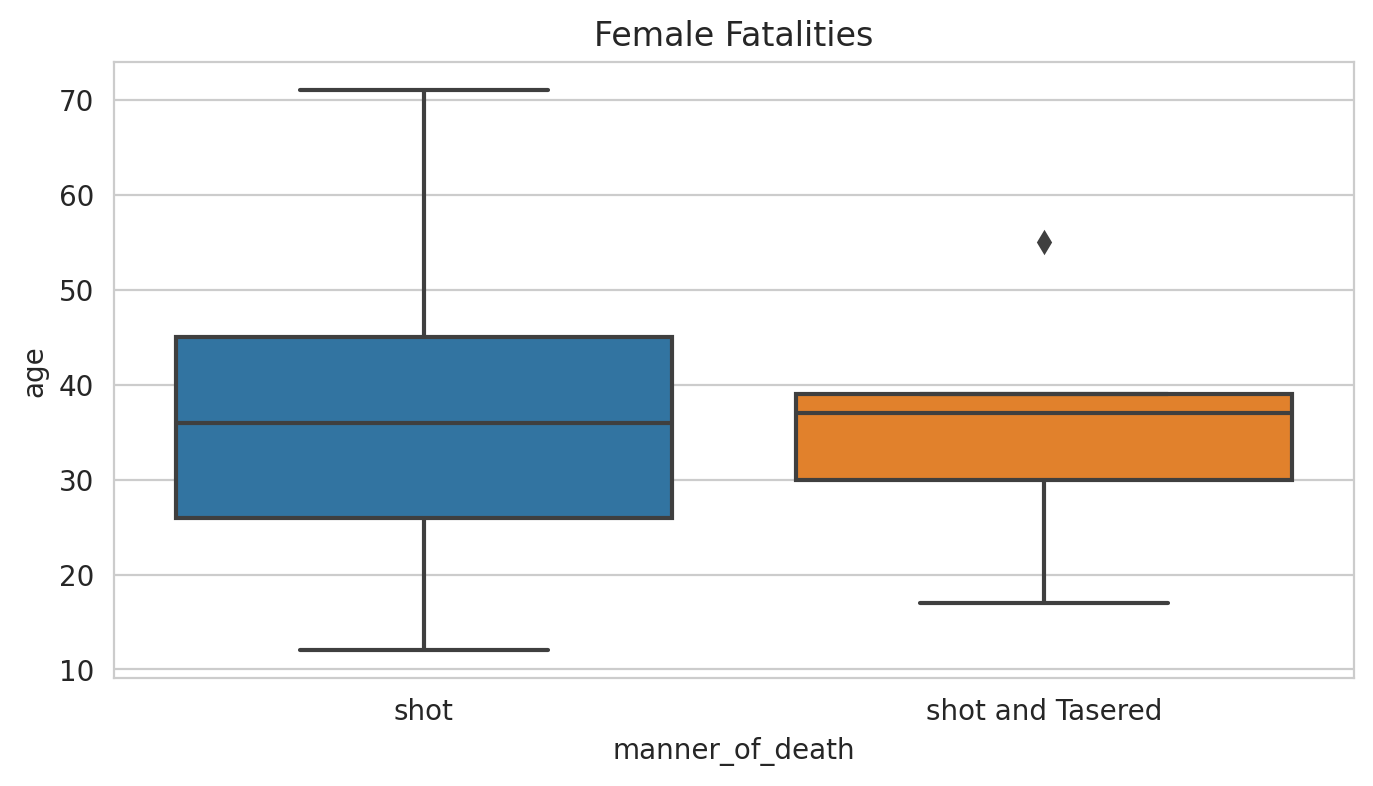

In [106]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=female_fatalities,
                x='manner_of_death',
                y='age')
plt.title("Female Fatalities")
plt.show()

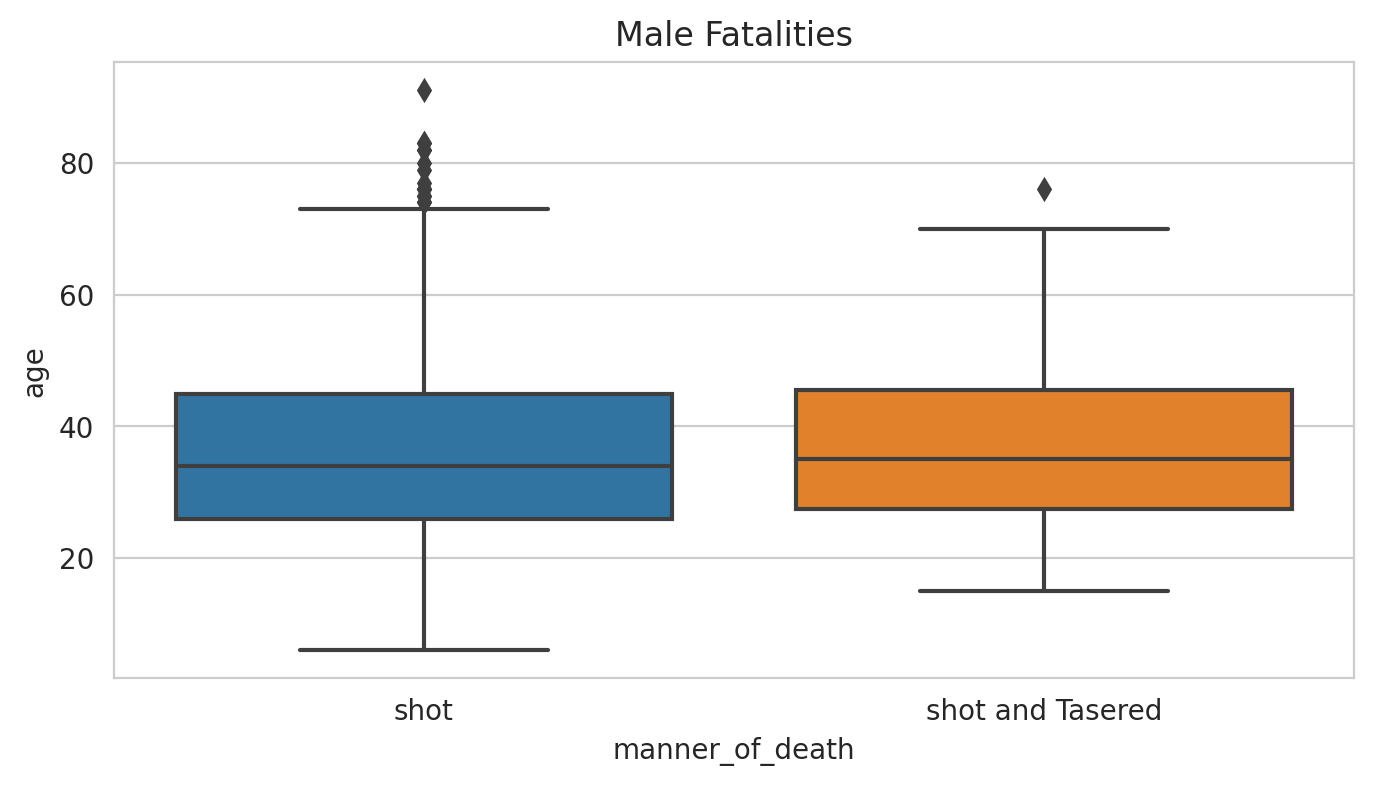

In [108]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=male_fatalities,
                x='manner_of_death',
                y='age')
plt.title("Male Fatalities")
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [117]:
unarmed_fatalities = df_fatalities[df_fatalities.armed == "unarmed"]
percentage_armed_people = (df_fatalities.armed.count() - unarmed_fatalities.armed.count())/df_fatalities.armed.count()
print(f"Percentage of police killings were people armed: {round(percentage_armed_people*100,2)}%")

Percentage of police killings were people armed: 92.48%


In [134]:
armed_grouped = df_fatalities.groupby("armed").armed.count()
fig = px.bar(x=armed_grouped.index, y=armed_grouped.values, log_y=True)
fig.update_layout(xaxis_title="Gun description", yaxis_title="Number of deaths")
fig.show()

In [124]:
gun_fatalities = df_fatalities[df_fatalities.armed == "gun"]
print(f"People armed with guns: {gun_fatalities.armed.count()}")
print(f"People unarmed: {unarmed_fatalities.armed.count()}")

People armed with guns: 1289
People unarmed: 176


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [149]:
under_25 = df_fatalities[df_fatalities.age < 25]
print(f"Percentage of people under 25 years old killed: {(1-(df_fatalities.age.count()-under_25.age.count())/df_fatalities.age.count())*100}%")

Percentage of people under 25 years old killed: 18.504273504273506%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

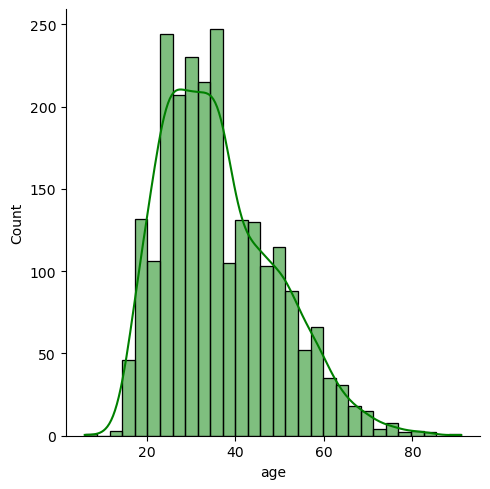

In [150]:
sns.displot(df_fatalities.age, kde='kde', color='green')
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

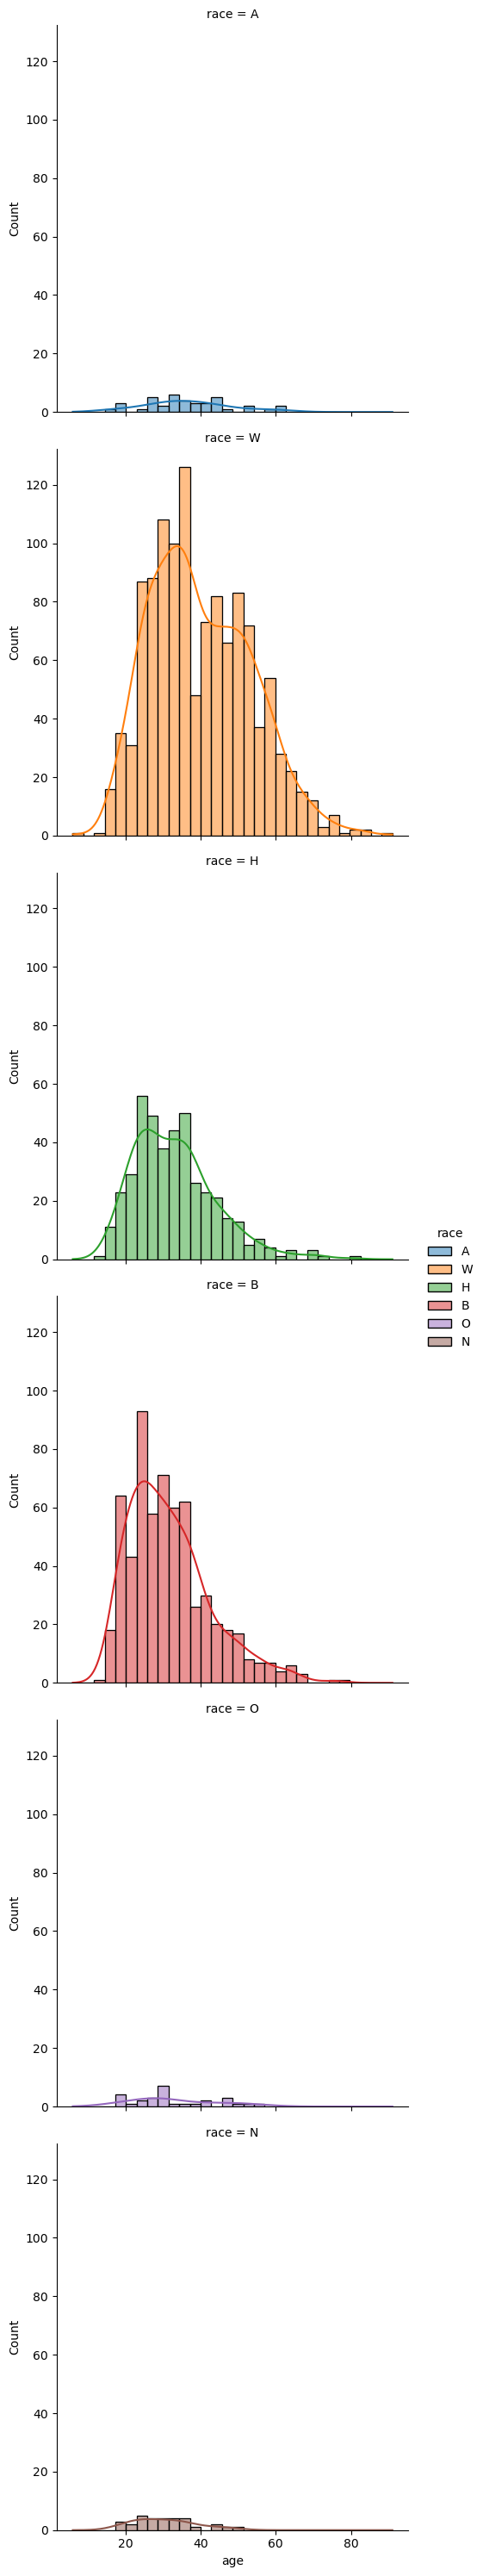

In [162]:
sns.displot(data=df_fatalities, x="age", row="race", kde="True", hue="race")
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [164]:
race_grouped = df_fatalities.groupby(["race"]).id.count()
race_grouped

race
A      39
B     618
H     423
N      31
O      28
W    1201
Name: id, dtype: int64

In [166]:
fig = px.bar(x=race_grouped.index, y=race_grouped.values)
fig.update_layout(xaxis_title="Race", yaxis_title="Number of deaths")
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [193]:
mental_illness = df_fatalities[df_fatalities.signs_of_mental_illness == df_fatalities.signs_of_mental_illness.unique()[0]]

In [194]:
print(f"Around {round(mental_illness.signs_of_mental_illness.count()/df_fatalities.signs_of_mental_illness.count()*100,2)}% have been diagnosed with a mental illness")

Around 25.09% have been diagnosed with a mental illness


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [203]:
city_killings = df_fatalities.groupby(["city"]).id.count()
city_killings.sort_values(ascending=False, inplace=True)

In [206]:
fig = px.bar(x=city_killings.index[:10], y=city_killings.values[:10])
fig.update_layout(xaxis_title="City", yaxis_title="Number of deaths")
fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [220]:
top10_cities = city_killings.index[:10].values
cities_race = df_fatalities.groupby(["city", "race"], as_index=False).id.count()
cities_race_share = df_share_race_city[df_share_race_city.City.isin(top10_cities)]
cities_race_share

Empty DataFrame
Columns: [Geographic area, City, share_white, share_black, share_native_american, share_asian, share_hispanic]
Index: []

Top10 cities not in race database...

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [244]:
death_state = df_fatalities.groupby(["state"]).id.count()

In [245]:
fig = px.choropleth(locations=death_state.index, 
                    locationmode="USA-states", 
                    color=death_state.values, 
                    scope="usa",  
                    color_continuous_scale=px.colors.sequential.matter)

fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [311]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)
deaths_date = df_fatalities.groupby(["date"]).count().id
deaths_date = deaths_date.resample("M").count()
deaths_date

date
2015-01-31    27
2015-02-28    27
2015-03-31    29
2015-04-30    29
2015-05-31    28
2015-06-30    29
2015-07-31    28
2015-08-31    26
2015-09-30    29
2015-10-31    28
2015-11-30    30
2015-12-31    29
2016-01-31    29
2016-02-29    29
2016-03-31    28
2016-04-30    28
2016-05-31    30
2016-06-30    27
2016-07-31    28
2016-08-31    29
2016-09-30    25
2016-10-31    28
2016-11-30    27
2016-12-31    25
2017-01-31    26
2017-02-28    20
2017-03-31    22
2017-04-30    24
2017-05-31    22
2017-06-30    20
2017-07-31    18
2017-08-31     7
2017-09-30     6
2017-10-31     6
2017-11-30     6
2017-12-31     6
Freq: M, Name: id, dtype: int64

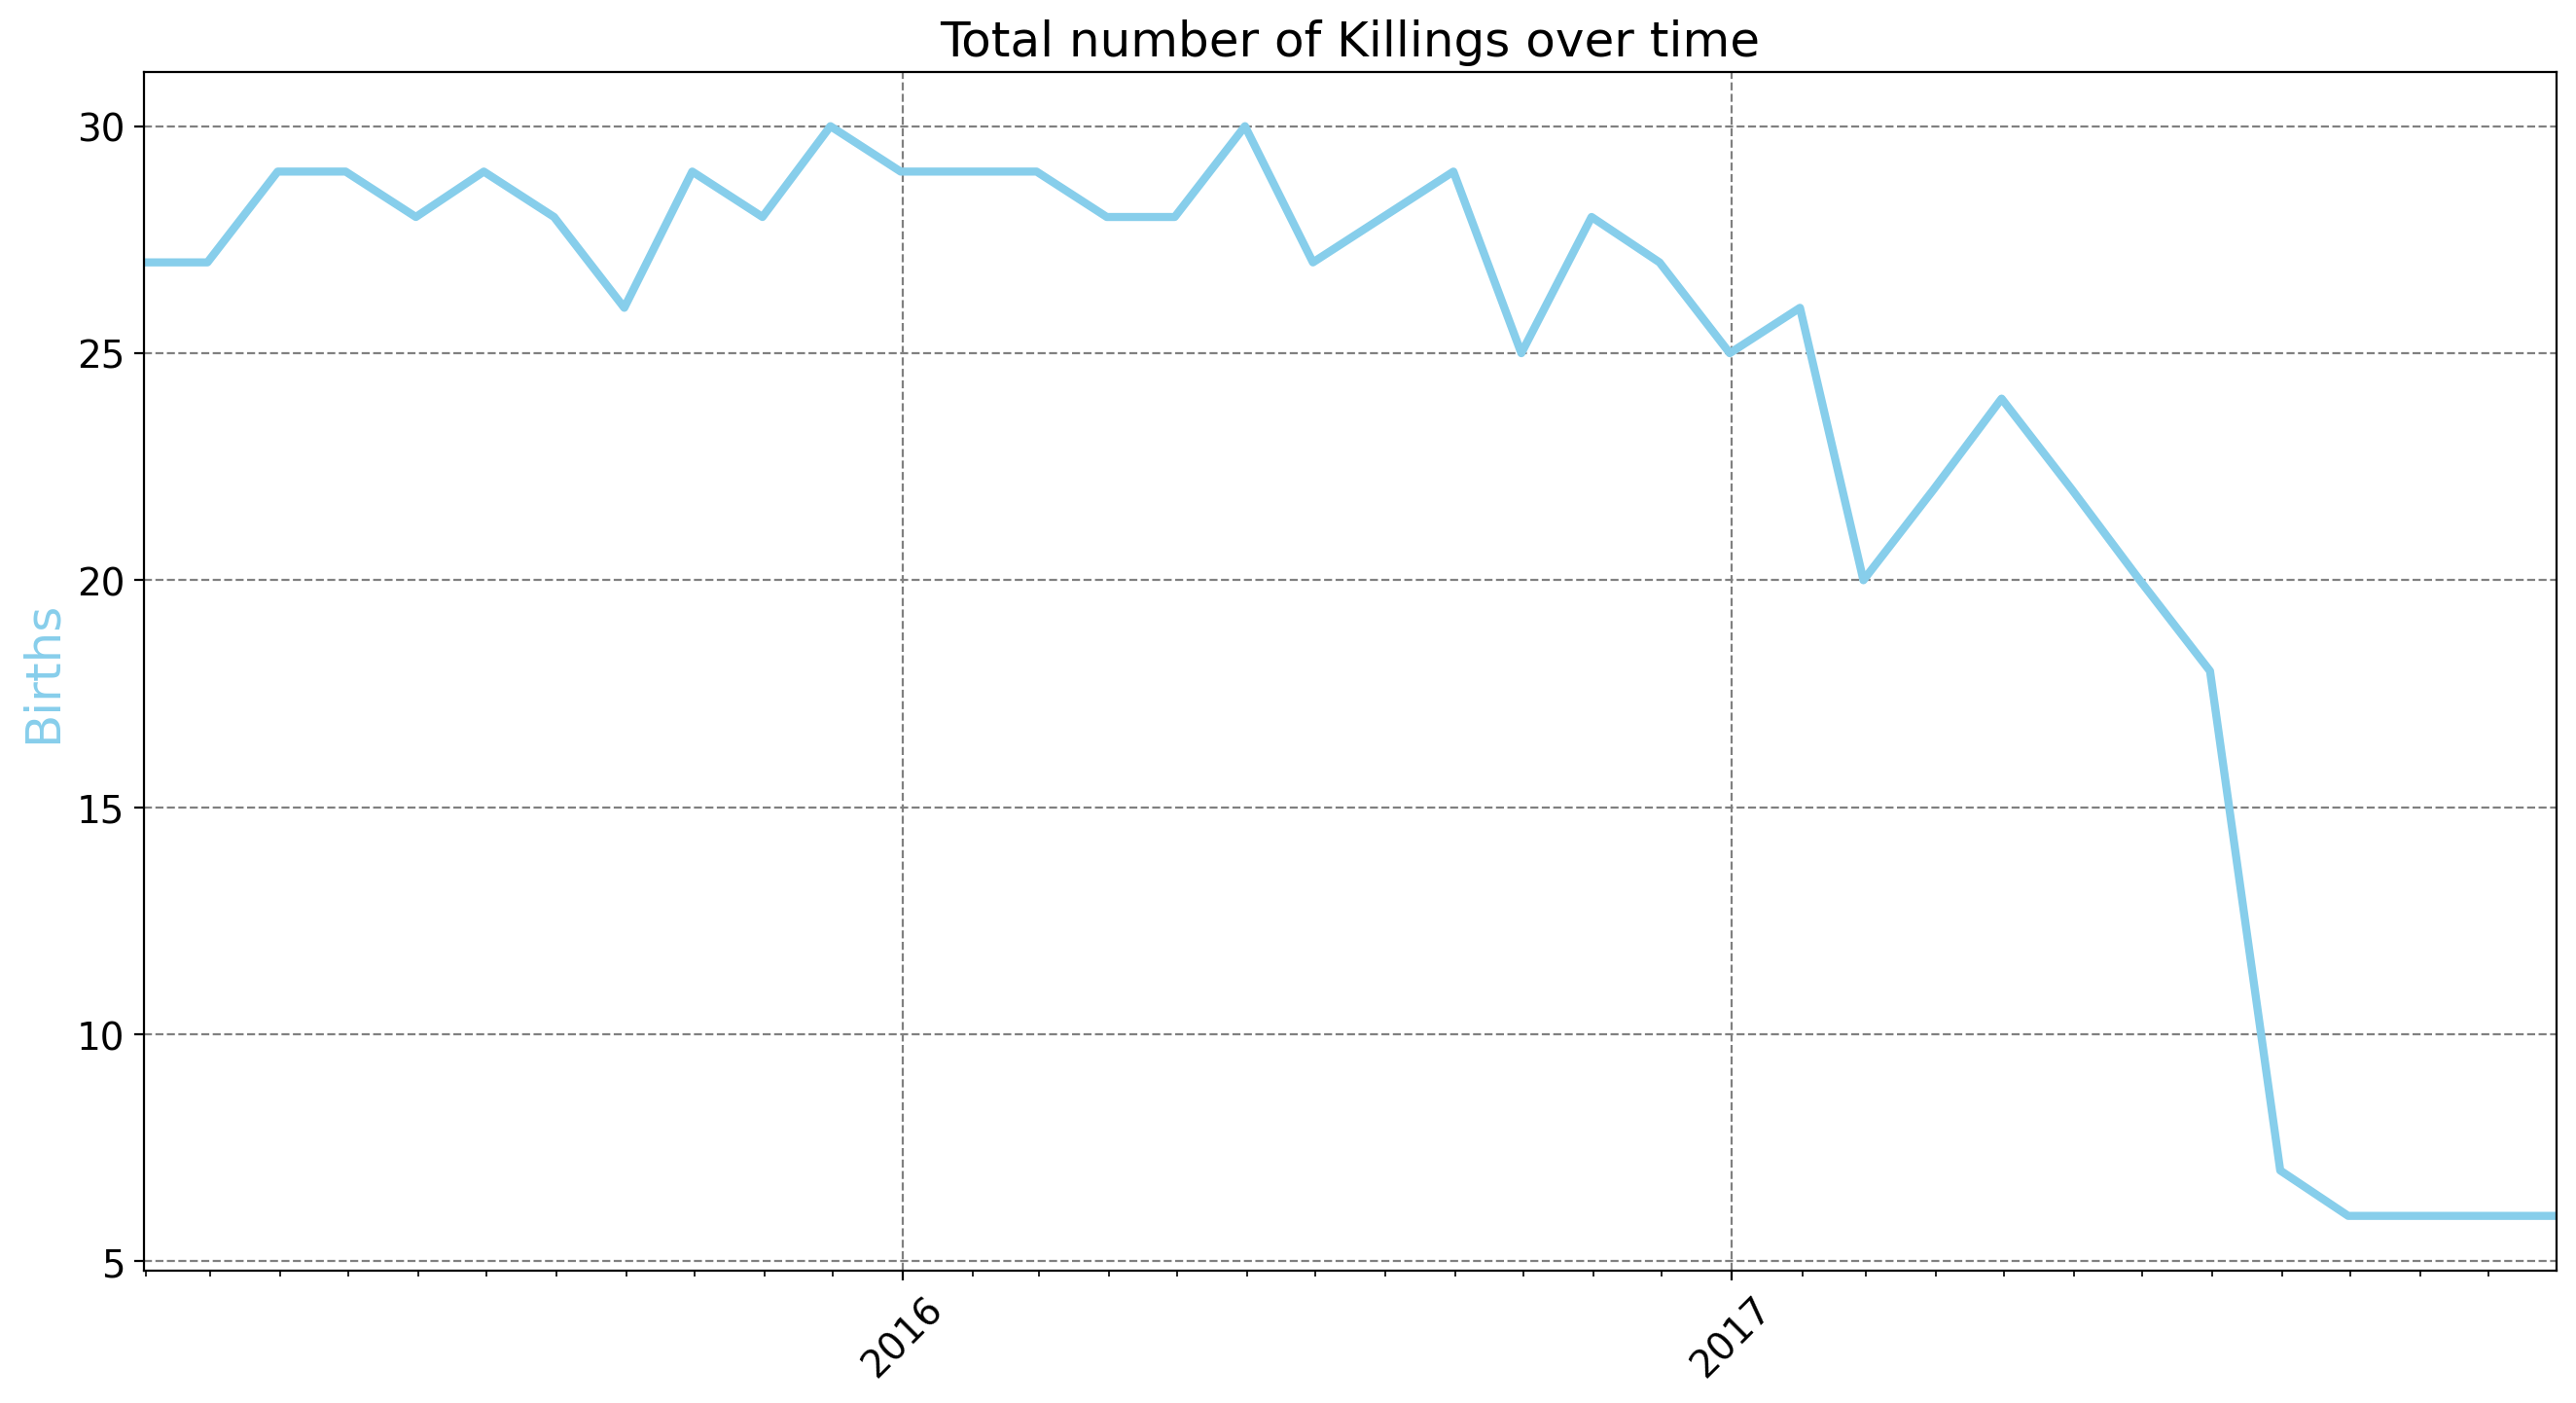

In [310]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Total number of Killings over time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax = plt.gca()
ax.grid(color='grey', linestyle='--')
 
ax.plot(deaths_date.index, 
         deaths_date.values, 
         c='skyblue', 
         linewidth=3)
 
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y') 
 
ax.set_ylabel('Births', color='skyblue', fontsize=18)

ax.set_xlim([deaths_date.index.min(), deaths_date.index.max()])
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).